In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
train = pd.read_csv('../Datasets/NB.csv')
train['Fault'] = 0

test = pd.read_csv('../Datasets/OR - 7.csv')
test['Fault'] = 1

In [3]:
dataset = train.append(test)
dataset

,DE,FE,Fault
0,0.064254,0.038625,0
1,0.063002,0.096769,0
2,-0.004381,0.127382,0
3,-0.035882,0.144640,0
4,-0.023991,0.086702,0
...,...,...,...
121150,0.165278,0.099029,1
121151,-0.075938,0.032256,1
121152,-0.268830,0.050747,1
121153,0.012995,0.093687,1


In [4]:
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [8]:
classifier = Sequential()

In [9]:
classifier.add(Dense(output_dim = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=2, units=2)`
  """Entry point for launching an IPython kernel.


In [10]:
classifier.add(Dense(output_dim = 2, kernel_initializer = 'uniform', activation = 'relu'))

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", units=2)`
  """Entry point for launching an IPython kernel.


In [11]:
classifier.add(Dense(output_dim = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="sigmoid", units=1)`
  """Entry point for launching an IPython kernel.


In [12]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [13]:
model = classifier.fit(X_train, y_train, batch_size = 1000, nb_epoch = 100, shuffle = False)


C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
193848/193848 [==============================] - 0s 2us/step - loss: 0.6923 - accuracy: 0.5574
Epoch 2/100
193848/193848 [==============================] - 0s 1us/step - loss: 0.6828 - accuracy: 0.6319
Epoch 3/100
193848/193848 [==============================] - 0s 1us/step - loss: 0.6626 - accuracy: 0.6615
Epoch 4/100
193848/193848 [==============================] - 0s 1us/step - loss: 0.6318 - accuracy: 0.7021
Epoch 5/100
193848/193848 [==============================] - 0s 1us/step - loss: 0.6019 - accuracy: 0.7162
Epoch 6/100
193848/193848 [==============================] - 0s 1us/step - loss: 0.5783 - accuracy: 0.7234
Epoch 7/100
193848/193848 [==============================] - 0s 1us/step - loss: 0.5630 - accuracy: 0.7271
Epoch 8/100
193848/193848 [==============================] - 0s 1us/step - loss: 0.5526 - accuracy: 0.7299
Epoch 9/100
193848/193848 [==============================] - 0s 1us/step - loss: 0.5410 - accuracy: 0.7359
Epoch 10/100
193848/193848 [=========

In [14]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

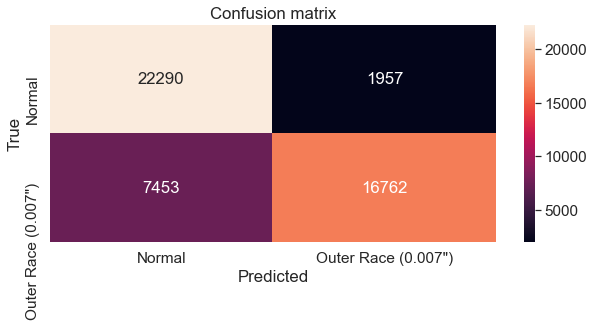

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal', 'Outer Race (0.007")']  
columns = ['Normal', 'Outer Race (0.007")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.show()

In [16]:
classifier.evaluate(X_test, y_test)

48462/48462 [==============================] - 1s 14us/step


[0.4177867264461982, 0.805827260017395]

In [17]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal', 'Outer Race (0.007")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       0.75      0.92      0.83     24247
Outer Race (0.007")       0.90      0.69      0.78     24215

           accuracy                           0.81     48462
          macro avg       0.82      0.81      0.80     48462
       weighted avg       0.82      0.81      0.80     48462



In [18]:
normal, OR = cm
anomalies = normal[1] + OR[0]
print("Anomalies: {}".format(anomalies))

Anomalies: 9410
